<h1 style= "text-align= center;"> blah blah blah <h1>

In [206]:
import pandas as pd 
import math as math 
import matplotlib.pyplot as plt 
import numpy as np
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error, r2_score

In [207]:
# Here are some imports we'll use through the notebook, collected here for simplicity

# For parsing dates and being able to compare
import datetime

# For fetching remote data
import urllib

# Pandas dataframes and operations
import pandas as pd

# Numpy matrix and array operations
import numpy as np

# Sqlite is a simplistic database
import sqlite3

# Data visualization
import matplotlib

#HAD ISSUES INSTALLING # Crawler for multiple web pages at once
#import scrapy
#from scrapy.crawler import CrawlerProcess
# Can use dataframe.swifter.apply() instead of dataframe.apply()
# to try to parallelize the computation!
#import swifter
# Approximate string matching, see 
#import py_stringsimjoin as ssj
#import py_stringmatching as sm
# import urllib and etree for download and parsing
#from lxml import etree

In [208]:
data = pd.read_csv('data.csv', delimiter=',')
# DELIMITER WHAT SEPERATES THE DATA (;)

print(type(data))

#Aliyah data defined 

<class 'pandas.core.frame.DataFrame'>


In [209]:
data_2 = pd.read_csv('CityState.csv', delimiter=',', engine='python', encoding='latin1')

#Jay's data defined 


In [210]:
columns_list = ['city', 'state', 'displayName','cost-after-aid']
row = list(range(7000))
new_data = pd.DataFrame(data, index=row, columns=columns_list)
new_data.head(7000)

#Aliyah's data print desired columns 

city state            displayName  cost-after-aid
0     Princeton    NJ   Princeton University         16793.0
1     Cambridge    MA     Harvard University         16338.0
2       Chicago    IL  University of Chicago         27767.0
3     New Haven    CT        Yale University         18385.0
4      New York    NY    Columbia University         21041.0
...         ...   ...                    ...             ...
6995        NaN   NaN                    NaN             NaN
6996        NaN   NaN                    NaN             NaN
6997        NaN   NaN                    NaN             NaN
6998        NaN   NaN                    NaN             NaN
6999        NaN   NaN                    NaN             NaN

[7000 rows x 4 columns]

In [211]:
columns_list = ['City', 'State_ab', 'Mean']
row = list(range(7000))
new_data = pd.DataFrame(data_2, index=row, columns=columns_list)
new_data.head(7000)

#Jay's data print desired columns 

City State_ab    Mean
0          Chickasaw       AL   38773
1         Louisville       AL   37725
2         Columbiana       AL   54606
3            Satsuma       AL   63919
4     Dauphin Island       AL   77948
...              ...      ...     ...
6995   Pompano Beach       FL   50778
6996     Dania Beach       FL   69836
6997   Coral Springs       FL  150858
6998   Coral Springs       FL  119477
6999   Coconut Creek       FL   47168

[7000 rows x 3 columns]

In [212]:
jay_data = data_2[['City', 'State_ab', 'Mean']]
print(jay_data)
#Jay's data print desired columns 

                 City State_ab   Mean
0           Chickasaw       AL  38773
1          Louisville       AL  37725
2          Columbiana       AL  54606
3             Satsuma       AL  63919
4      Dauphin Island       AL  77948
...               ...      ...    ...
32521        Guaynabo       PR  30649
32522          Aguada       PR  15520
32523          Aguada       PR  41933
32524          Aguada       PR      0
32525       Aguadilla       PR  28049

[32526 rows x 3 columns]


In [213]:
# Let's take a look at the name and born data in exec_df.  We do this via projection.  
# Notice also (e.g. row 24) that special characters will cause issues.


aliyah_data = data[['city', 'state', 'displayName','cost-after-aid']]
print(aliyah_data)
#Aliyah's data print desired columns 

            city state                       displayName  cost-after-aid
0      Princeton    NJ              Princeton University         16793.0
1      Cambridge    MA                Harvard University         16338.0
2        Chicago    IL             University of Chicago         27767.0
3      New Haven    CT                   Yale University         18385.0
4       New York    NY               Columbia University         21041.0
..           ...   ...                               ...             ...
306      Cypress    CA  Trident University International             NaN
307   Cincinnati    OH    Union Institute and University             NaN
308      Phoenix    AZ             University of Phoenix             NaN
309  Minneapolis    MN                 Walden University             NaN
310   New Castle    DE             Wilmington University             NaN

[311 rows x 4 columns]


In [214]:
df = pd.DataFrame(aliyah_data) 
aliyah_clean = df.dropna()
print(aliyah_clean)
#Aliyah data dropped all NaN

           city state                      displayName  cost-after-aid
0     Princeton    NJ             Princeton University         16793.0
1     Cambridge    MA               Harvard University         16338.0
2       Chicago    IL            University of Chicago         27767.0
3     New Haven    CT                  Yale University         18385.0
4      New York    NY              Columbia University         21041.0
..          ...   ...                              ...             ...
145   Corvallis    OR          Oregon State University         36636.0
146   Rochester    NY          St. John Fisher College         28750.0
147     Chicago    IL  University of Illinois--Chicago         39033.0
148  University    MS        University of Mississippi         27943.0
149  Richardson    TX      University of Texas--Dallas         37028.0

[143 rows x 4 columns]


In [215]:
df = pd.DataFrame(jay_data) 
df_dropped = df.dropna()
print(df_dropped)
#Jay data dropped all NaN


                 City State_ab   Mean
0           Chickasaw       AL  38773
1          Louisville       AL  37725
2          Columbiana       AL  54606
3             Satsuma       AL  63919
4      Dauphin Island       AL  77948
...               ...      ...    ...
32521        Guaynabo       PR  30649
32522          Aguada       PR  15520
32523          Aguada       PR  41933
32524          Aguada       PR      0
32525       Aguadilla       PR  28049

[32526 rows x 3 columns]


In [216]:
jay_clean = df_dropped[df_dropped['Mean'] != 0]

print(jay_clean)

#Jay's data that dropped the 0's

                 City State_ab   Mean
0           Chickasaw       AL  38773
1          Louisville       AL  37725
2          Columbiana       AL  54606
3             Satsuma       AL  63919
4      Dauphin Island       AL  77948
...               ...      ...    ...
32520        Adjuntas       PR  23682
32521        Guaynabo       PR  30649
32522          Aguada       PR  15520
32523          Aguada       PR  41933
32525       Aguadilla       PR  28049

[32211 rows x 3 columns]


In [217]:
merged_data = pd.merge(jay_clean, aliyah_clean, left_on='City', right_on='city')
print(merged_data)


           City State_ab   Mean       city state   
0     Cleveland       AL  55127  Cleveland    OH  \
1     Cleveland       AL  56385  Cleveland    OH   
2     Cleveland       GA  44684  Cleveland    OH   
3     Cleveland       MS  34603  Cleveland    OH   
4     Cleveland       MS  25632  Cleveland    OH   
...         ...      ...    ...        ...   ...   
7480  Milwaukee       WI  45808  Milwaukee    WI   
7481  Milwaukee       WI  38857  Milwaukee    WI   
7482  Milwaukee       WI  59171  Milwaukee    WI   
7483  Milwaukee       WI  37089  Milwaukee    WI   
7484  Milwaukee       WI  23988  Milwaukee    WI   

                          displayName  cost-after-aid  
0     Case Western Reserve University         35248.0  
1     Case Western Reserve University         35248.0  
2     Case Western Reserve University         35248.0  
3     Case Western Reserve University         35248.0  
4     Case Western Reserve University         35248.0  
...                               ...  

In [218]:
columns_to_delete = ['state','city']

# Create a new DataFrame by selecting the columns you want to keep
data = merged_data.drop(columns_to_delete, axis=1)

# The resulting DataFrame will have columns A, B
print(data)

           City State_ab   Mean                      displayName   
0     Cleveland       AL  55127  Case Western Reserve University  \
1     Cleveland       AL  56385  Case Western Reserve University   
2     Cleveland       GA  44684  Case Western Reserve University   
3     Cleveland       MS  34603  Case Western Reserve University   
4     Cleveland       MS  25632  Case Western Reserve University   
...         ...      ...    ...                              ...   
7480  Milwaukee       WI  45808             Marquette University   
7481  Milwaukee       WI  38857             Marquette University   
7482  Milwaukee       WI  59171             Marquette University   
7483  Milwaukee       WI  37089             Marquette University   
7484  Milwaukee       WI  23988             Marquette University   

      cost-after-aid  
0            35248.0  
1            35248.0  
2            35248.0  
3            35248.0  
4            35248.0  
...              ...  
7480         32894.0  

In [219]:
# Transforming categorial values to numerical values
#Change this stuff to dictonaries and have it replace the states + cities with numbers
cities = {'Ames':1, 'Amherst':2, 'Ann Arbor':3, 'Athens':4, 'Atlanta':5, 'Auburn':6, 'Austin':7, 'Baltimore':8, 'Baton Rouge':9, 'Berkeley':10, 'Bethlehem':11, 'Binghamton':12, 'Bloomington':12, 'Boston':13, 'Boulder':14, 'Buffalo':15, 'Burlington':16, 'Cambridge':17, 'Champaign':18, 'Chapel Hill':19, 'Charlottesville':20, 'Chestnut Hill':21, 'Chicago':22, 'Cincinnati':23, 'Clemson':24, 'Cleveland':25, 'College Park':26, 'College Station':27, 'Columbia':28, 'Columbus':29, 'Coral Gables':30, 'Corvallis':31, 'Dallas':32, 'Davis':33, 'Dayton':34, 'Denver':35, 'Durham':36, 'East Lansing':37 ,'Eugene':38, 'Evanston':39, 'Fairfax':40, 'Fayetteville':41, 'Fort Collins':42, 'Fort Worth':43, 'Gainesville':44, 'Golden':45, 'Hanover':46, 'Hempstead':47, 'Hoboken':48, 'Houghton':49, 'Houston':50, 'Iowa City':51, 'Irvine':52, 'Ithaca':53, 'Knoxville':54, 'La Jolla':55, 'Lawrence':56, 'Lincoln':57, 'Los Angeles':58, 'Macon':59, 'Madison':60, 'Manhattan':61, 'Medford':62, 'Milwaukee':63, 'Minneapolis':64, 'Nashville':65, 'New Haven':66, 'New Orleans':67, 'New York':68, 'Newark':69, 'Norman':70, 'Oxford':71, 'Pasadena':72, 'Philadelphia':73, 'Piscataway':74, 'Pittsburgh':75, 'Potsdam':76, 'Princeton':77, 'Providence':78, 'Provo':79, 'Pullman':80, 'Raleigh':81, 'Richardson':82, 'Riverside':83, 'Rochester':84, 'Salt Lake City':85, 'San Diego':86, 'San Francisco':87, 'Santa Barbara':88, 'Santa Cruz':89, 'Seattle':90, 'St. Louis':91, 'St. Paul':92, 'Stockton':93, 'Syracuse':94, 'Tallahassee':95, 'Tampa':96, 'Tempe':97, 'Troy':98, 'Tucson':99, 'Tulsa':100, 'Tuscaloosa':101, 'Waco':102, 'Waltham':103, 'Washington':104, 'West Lafayette':105, 'Williamsburg':106, 'Worcester':107}

state_abbreviations = {'AL':1, 'AR':2, 'AZ':3, 'CA':4, 'CO':5, 'CT':6, 'DC':7, 'DE':8, 'FL':9, 'GA':10, 'IA':11, 'ID':12, 'IL':13, 'IN':14, 'KS':15, 'KY':16, 'LA':17, 'MA':18, 'MD':19, 'ME':20, 'MI':21, 'MN':22, 'MO':23, 'MS':24, 'MT':25, 'NC':26, 'ND':27, 'NE':28, 'NH':29, 'NJ':30, 'NY':31, 'OH':32, 'OK':33, 'OR':34, 'PA':35, 'RI':36, 'SC':37, 'SD':38, 'TN':39, 'TX':40, 'UT':41, 'VA':42, 'VT':43, 'WA':44, 'WI':45, 'WV':46, 'WY':47}


data1 = data.replace(list(state_abbreviations.keys()), list(state_abbreviations.values()))
print(data1)

           City  State_ab   Mean                      displayName   
0     Cleveland         1  55127  Case Western Reserve University  \
1     Cleveland         1  56385  Case Western Reserve University   
2     Cleveland        10  44684  Case Western Reserve University   
3     Cleveland        24  34603  Case Western Reserve University   
4     Cleveland        24  25632  Case Western Reserve University   
...         ...       ...    ...                              ...   
7480  Milwaukee        45  45808             Marquette University   
7481  Milwaukee        45  38857             Marquette University   
7482  Milwaukee        45  59171             Marquette University   
7483  Milwaukee        45  37089             Marquette University   
7484  Milwaukee        45  23988             Marquette University   

      cost-after-aid  
0            35248.0  
1            35248.0  
2            35248.0  
3            35248.0  
4            35248.0  
...              ...  
7480      

In [220]:
data2 = data1.replace(list(cities.keys()), list(cities.values()))
print(data2)

      City  State_ab   Mean                      displayName  cost-after-aid
0       25         1  55127  Case Western Reserve University         35248.0
1       25         1  56385  Case Western Reserve University         35248.0
2       25        10  44684  Case Western Reserve University         35248.0
3       25        24  34603  Case Western Reserve University         35248.0
4       25        24  25632  Case Western Reserve University         35248.0
...    ...       ...    ...                              ...             ...
7480    63        45  45808             Marquette University         32894.0
7481    63        45  38857             Marquette University         32894.0
7482    63        45  59171             Marquette University         32894.0
7483    63        45  37089             Marquette University         32894.0
7484    63        45  23988             Marquette University         32894.0

[7485 rows x 5 columns]


In [221]:
#MeanMax = data2['Mean'].max()
#MinMean = data2['Mean'].min()

# print(MeanMax)
# print(MinMean)
# Calc = (45808-MinMean)/MeanMax
# print(Calc)

In [222]:
# # Assuming you have a large DataFrame named 'data' and the column name is 'column_name'
# column_name = 'Mean'

# # Calculate the minimum and maximum values
# min_value = data2[column_name].min()
# max_value = data2[column_name].max()

# # Iterate over each row using iterrows()
# for index, row in data.iterrows():
#     value = row[column_name]
#     mean_results = (value - min_value) / max_value
#     # Perform desired actions with the result
#     print(mean_results)

In [223]:
data2['cost-after-aid'][2]
print(len(data2))

# Assuming you have a large DataFrame named 'data' and the column name is 'column_name'
column_name1 = 'cost-after-aid'

# Calculate the minimum and maximum values
min_value1 = data2[column_name1].min()
max_value1 = data2[column_name1].max()

for index in range(0,len(data2)):
    data2[column_name1][index] = (data2[column_name1][index] - min_value1) / max_value1


# Assuming you have a large DataFrame named 'data' and the column name is 'column_name'
column_name2 = 'Mean'

# Calculate the minimum and maximum values
min_value2 = data2[column_name2].min()
max_value2 = data2[column_name2].max()
for index in range(0,len(data2)):
    data2[column_name2][index] = (data2[column_name2][index] - min_value2) / max_value2


7485


C:\Users\bigsh\AppData\Local\Temp\ipykernel_11336\2863715883.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2[column_name1][index] = (data2[column_name1][index] - min_value1) / max_value1
C:\Users\bigsh\AppData\Local\Temp\ipykernel_11336\2863715883.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2[column_name1][index] = (data2[column_name1][index] - min_value1) / max_value1
C:\Users\bigsh\AppData\Local\Temp\ipykernel_11336\2863715883.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas

C:\Users\bigsh\AppData\Local\Temp\ipykernel_11336\2863715883.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2[column_name1][index] = (data2[column_name1][index] - min_value1) / max_value1
C:\Users\bigsh\AppData\Local\Temp\ipykernel_11336\2863715883.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2[column_name1][index] = (data2[column_name1][index] - min_value1) / max_value1
C:\Users\bigsh\AppData\Local\Temp\ipykernel_11336\2863715883.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas

In [224]:
data2.head()
data2.to_csv("cleaned_data.csv")

In [225]:
# # Assuming you have a large DataFrame named 'data' and the column name is 'column_name'
# column_name = 'cost-after-aid'

# # Calculate the minimum and maximum values
# min_value = data2[column_name].min()
# max_value = data2[column_name].max()

# # Iterate over each row using iterrows()
# for index, row in data.iterrows():
#     value = row[column_name]
#     aid_result = (value - min_value) / max_value
#     # Perform desired actions with the result
#     print(aid_result)

In [226]:

# X = merged_data.iloc[:,1:6].values.reshape(-1, 1)
X = data2.iloc[:,0:3].values
y = data2.iloc[:,4].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an instance of the LinearRegression model
model = LinearRegression()


# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

print("Data Feature:", X_test)

print("predicted values:",y_pred)


Data Feature: [[ 28.          37.           0.11775654]
 [100.          33.           0.26132662]
 [ 22.          13.           0.47462499]
 ...
 [ 22.          13.           0.43142672]
 [ 68.          31.           0.19531659]
 [ 86.           4.           0.23890191]]
predicted values: [0.39925147 0.39587364 0.43331191 ... 0.43106718 0.39952923 0.41469859]


In [227]:
# prediction of the the model 
predicted_results = model.predict(X_test)
print(predicted_results) 
print(y_test)


[0.39925147 0.39587364 0.43331191 ... 0.43106718 0.39952923 0.41469859]
[0.28519591 0.70972785 0.28143216 ... 0.49888052 0.15161166 0.45695812]


In [228]:
import math as math

values = abs(predicted_results-y_test)
print(values.min())
print(values.max())

6.631070833129638e-05
0.39262345462246645


In [229]:
#CARLOS
# print metrics

print(mean_squared_error(y_test, predicted_results))


0.019444697718909682


In [230]:
import pandas as pd 
import math as math 
import matplotlib.pyplot as plt 
import numpy as np
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error, r2_score

In [232]:
data = pd.read_csv('data.csv', delimiter=',')
# DELIMITER WHAT SEPERATES THE DATA (;)

print(type(data))

#Aliyah data defined 

<class 'pandas.core.frame.DataFrame'>


In [233]:
data_2 = pd.read_csv('CityState.csv', delimiter=',', engine='python', encoding='latin1')

#Jay's data defined 


In [234]:
columns_list = ['city', 'state', 'displayName','cost-after-aid']
row = list(range(7000))
new_data = pd.DataFrame(data, index=row, columns=columns_list)
new_data.head(7000)

#Aliyah's data print desired columns 

city state            displayName  cost-after-aid
0     Princeton    NJ   Princeton University         16793.0
1     Cambridge    MA     Harvard University         16338.0
2       Chicago    IL  University of Chicago         27767.0
3     New Haven    CT        Yale University         18385.0
4      New York    NY    Columbia University         21041.0
...         ...   ...                    ...             ...
6995        NaN   NaN                    NaN             NaN
6996        NaN   NaN                    NaN             NaN
6997        NaN   NaN                    NaN             NaN
6998        NaN   NaN                    NaN             NaN
6999        NaN   NaN                    NaN             NaN

[7000 rows x 4 columns]

In [235]:
columns_list = ['City', 'State_ab', 'Mean']
row = list(range(7000))
new_data = pd.DataFrame(data_2, index=row, columns=columns_list)
new_data.head(7000)

#Jay's data print desired columns 

City State_ab    Mean
0          Chickasaw       AL   38773
1         Louisville       AL   37725
2         Columbiana       AL   54606
3            Satsuma       AL   63919
4     Dauphin Island       AL   77948
...              ...      ...     ...
6995   Pompano Beach       FL   50778
6996     Dania Beach       FL   69836
6997   Coral Springs       FL  150858
6998   Coral Springs       FL  119477
6999   Coconut Creek       FL   47168

[7000 rows x 3 columns]

In [236]:
jay_data = data_2[['City', 'State_ab', 'Mean']]
print(jay_data)
#Jay's data print desired columns 

                 City State_ab   Mean
0           Chickasaw       AL  38773
1          Louisville       AL  37725
2          Columbiana       AL  54606
3             Satsuma       AL  63919
4      Dauphin Island       AL  77948
...               ...      ...    ...
32521        Guaynabo       PR  30649
32522          Aguada       PR  15520
32523          Aguada       PR  41933
32524          Aguada       PR      0
32525       Aguadilla       PR  28049

[32526 rows x 3 columns]


In [237]:
# Let's take a look at the name and born data in exec_df.  We do this via projection.  
# Notice also (e.g. row 24) that special characters will cause issues.


aliyah_data = data[['city', 'state', 'displayName','cost-after-aid']]
print(aliyah_data)
#Aliyah's data print desired columns 

            city state                       displayName  cost-after-aid
0      Princeton    NJ              Princeton University         16793.0
1      Cambridge    MA                Harvard University         16338.0
2        Chicago    IL             University of Chicago         27767.0
3      New Haven    CT                   Yale University         18385.0
4       New York    NY               Columbia University         21041.0
..           ...   ...                               ...             ...
306      Cypress    CA  Trident University International             NaN
307   Cincinnati    OH    Union Institute and University             NaN
308      Phoenix    AZ             University of Phoenix             NaN
309  Minneapolis    MN                 Walden University             NaN
310   New Castle    DE             Wilmington University             NaN

[311 rows x 4 columns]


In [238]:
df = pd.DataFrame(aliyah_data) 
aliyah_clean = df.dropna()
print(aliyah_clean)
#Aliyah data dropped all NaN

           city state                      displayName  cost-after-aid
0     Princeton    NJ             Princeton University         16793.0
1     Cambridge    MA               Harvard University         16338.0
2       Chicago    IL            University of Chicago         27767.0
3     New Haven    CT                  Yale University         18385.0
4      New York    NY              Columbia University         21041.0
..          ...   ...                              ...             ...
145   Corvallis    OR          Oregon State University         36636.0
146   Rochester    NY          St. John Fisher College         28750.0
147     Chicago    IL  University of Illinois--Chicago         39033.0
148  University    MS        University of Mississippi         27943.0
149  Richardson    TX      University of Texas--Dallas         37028.0

[143 rows x 4 columns]


In [239]:
df = pd.DataFrame(jay_data) 
df_dropped = df.dropna()
print(df_dropped)
#Jay data dropped all NaN


                 City State_ab   Mean
0           Chickasaw       AL  38773
1          Louisville       AL  37725
2          Columbiana       AL  54606
3             Satsuma       AL  63919
4      Dauphin Island       AL  77948
...               ...      ...    ...
32521        Guaynabo       PR  30649
32522          Aguada       PR  15520
32523          Aguada       PR  41933
32524          Aguada       PR      0
32525       Aguadilla       PR  28049

[32526 rows x 3 columns]


In [240]:
jay_clean = df_dropped[df_dropped['Mean'] != 0]

print(jay_clean)

#Jay's data that dropped the 0's

                 City State_ab   Mean
0           Chickasaw       AL  38773
1          Louisville       AL  37725
2          Columbiana       AL  54606
3             Satsuma       AL  63919
4      Dauphin Island       AL  77948
...               ...      ...    ...
32520        Adjuntas       PR  23682
32521        Guaynabo       PR  30649
32522          Aguada       PR  15520
32523          Aguada       PR  41933
32525       Aguadilla       PR  28049

[32211 rows x 3 columns]


In [241]:
merged_data = pd.merge(jay_clean, aliyah_clean, left_on='City', right_on='city')
print(merged_data)


           City State_ab   Mean       city state   
0     Cleveland       AL  55127  Cleveland    OH  \
1     Cleveland       AL  56385  Cleveland    OH   
2     Cleveland       GA  44684  Cleveland    OH   
3     Cleveland       MS  34603  Cleveland    OH   
4     Cleveland       MS  25632  Cleveland    OH   
...         ...      ...    ...        ...   ...   
7480  Milwaukee       WI  45808  Milwaukee    WI   
7481  Milwaukee       WI  38857  Milwaukee    WI   
7482  Milwaukee       WI  59171  Milwaukee    WI   
7483  Milwaukee       WI  37089  Milwaukee    WI   
7484  Milwaukee       WI  23988  Milwaukee    WI   

                          displayName  cost-after-aid  
0     Case Western Reserve University         35248.0  
1     Case Western Reserve University         35248.0  
2     Case Western Reserve University         35248.0  
3     Case Western Reserve University         35248.0  
4     Case Western Reserve University         35248.0  
...                               ...  

In [242]:
columns_to_delete = ['state','city']

# Create a new DataFrame by selecting the columns you want to keep
data = merged_data.drop(columns_to_delete, axis=1)

# The resulting DataFrame will have columns A, B
print(data)

           City State_ab   Mean                      displayName   
0     Cleveland       AL  55127  Case Western Reserve University  \
1     Cleveland       AL  56385  Case Western Reserve University   
2     Cleveland       GA  44684  Case Western Reserve University   
3     Cleveland       MS  34603  Case Western Reserve University   
4     Cleveland       MS  25632  Case Western Reserve University   
...         ...      ...    ...                              ...   
7480  Milwaukee       WI  45808             Marquette University   
7481  Milwaukee       WI  38857             Marquette University   
7482  Milwaukee       WI  59171             Marquette University   
7483  Milwaukee       WI  37089             Marquette University   
7484  Milwaukee       WI  23988             Marquette University   

      cost-after-aid  
0            35248.0  
1            35248.0  
2            35248.0  
3            35248.0  
4            35248.0  
...              ...  
7480         32894.0  

In [243]:
# Transforming categorial values to numerical values
#Change this stuff to dictonaries and have it replace the states + cities with numbers
cities = {'Ames':1, 'Amherst':2, 'Ann Arbor':3, 'Athens':4, 'Atlanta':5, 'Auburn':6, 'Austin':7, 'Baltimore':8, 'Baton Rouge':9, 'Berkeley':10, 'Bethlehem':11, 'Binghamton':12, 'Bloomington':12, 'Boston':13, 'Boulder':14, 'Buffalo':15, 'Burlington':16, 'Cambridge':17, 'Champaign':18, 'Chapel Hill':19, 'Charlottesville':20, 'Chestnut Hill':21, 'Chicago':22, 'Cincinnati':23, 'Clemson':24, 'Cleveland':25, 'College Park':26, 'College Station':27, 'Columbia':28, 'Columbus':29, 'Coral Gables':30, 'Corvallis':31, 'Dallas':32, 'Davis':33, 'Dayton':34, 'Denver':35, 'Durham':36, 'East Lansing':37 ,'Eugene':38, 'Evanston':39, 'Fairfax':40, 'Fayetteville':41, 'Fort Collins':42, 'Fort Worth':43, 'Gainesville':44, 'Golden':45, 'Hanover':46, 'Hempstead':47, 'Hoboken':48, 'Houghton':49, 'Houston':50, 'Iowa City':51, 'Irvine':52, 'Ithaca':53, 'Knoxville':54, 'La Jolla':55, 'Lawrence':56, 'Lincoln':57, 'Los Angeles':58, 'Macon':59, 'Madison':60, 'Manhattan':61, 'Medford':62, 'Milwaukee':63, 'Minneapolis':64, 'Nashville':65, 'New Haven':66, 'New Orleans':67, 'New York':68, 'Newark':69, 'Norman':70, 'Oxford':71, 'Pasadena':72, 'Philadelphia':73, 'Piscataway':74, 'Pittsburgh':75, 'Potsdam':76, 'Princeton':77, 'Providence':78, 'Provo':79, 'Pullman':80, 'Raleigh':81, 'Richardson':82, 'Riverside':83, 'Rochester':84, 'Salt Lake City':85, 'San Diego':86, 'San Francisco':87, 'Santa Barbara':88, 'Santa Cruz':89, 'Seattle':90, 'St. Louis':91, 'St. Paul':92, 'Stockton':93, 'Syracuse':94, 'Tallahassee':95, 'Tampa':96, 'Tempe':97, 'Troy':98, 'Tucson':99, 'Tulsa':100, 'Tuscaloosa':101, 'Waco':102, 'Waltham':103, 'Washington':104, 'West Lafayette':105, 'Williamsburg':106, 'Worcester':107}

state_abbreviations = {'AL':1, 'AR':2, 'AZ':3, 'CA':4, 'CO':5, 'CT':6, 'DC':7, 'DE':8, 'FL':9, 'GA':10, 'IA':11, 'ID':12, 'IL':13, 'IN':14, 'KS':15, 'KY':16, 'LA':17, 'MA':18, 'MD':19, 'ME':20, 'MI':21, 'MN':22, 'MO':23, 'MS':24, 'MT':25, 'NC':26, 'ND':27, 'NE':28, 'NH':29, 'NJ':30, 'NY':31, 'OH':32, 'OK':33, 'OR':34, 'PA':35, 'RI':36, 'SC':37, 'SD':38, 'TN':39, 'TX':40, 'UT':41, 'VA':42, 'VT':43, 'WA':44, 'WI':45, 'WV':46, 'WY':47}


data1 = data.replace(list(state_abbreviations.keys()), list(state_abbreviations.values()))
print(data1)

           City  State_ab   Mean                      displayName   
0     Cleveland         1  55127  Case Western Reserve University  \
1     Cleveland         1  56385  Case Western Reserve University   
2     Cleveland        10  44684  Case Western Reserve University   
3     Cleveland        24  34603  Case Western Reserve University   
4     Cleveland        24  25632  Case Western Reserve University   
...         ...       ...    ...                              ...   
7480  Milwaukee        45  45808             Marquette University   
7481  Milwaukee        45  38857             Marquette University   
7482  Milwaukee        45  59171             Marquette University   
7483  Milwaukee        45  37089             Marquette University   
7484  Milwaukee        45  23988             Marquette University   

      cost-after-aid  
0            35248.0  
1            35248.0  
2            35248.0  
3            35248.0  
4            35248.0  
...              ...  
7480      

In [244]:
data2 = data1.replace(list(cities.keys()), list(cities.values()))
print(data2)

      City  State_ab   Mean                      displayName  cost-after-aid
0       25         1  55127  Case Western Reserve University         35248.0
1       25         1  56385  Case Western Reserve University         35248.0
2       25        10  44684  Case Western Reserve University         35248.0
3       25        24  34603  Case Western Reserve University         35248.0
4       25        24  25632  Case Western Reserve University         35248.0
...    ...       ...    ...                              ...             ...
7480    63        45  45808             Marquette University         32894.0
7481    63        45  38857             Marquette University         32894.0
7482    63        45  59171             Marquette University         32894.0
7483    63        45  37089             Marquette University         32894.0
7484    63        45  23988             Marquette University         32894.0

[7485 rows x 5 columns]


In [245]:
#MeanMax = data2['Mean'].max()
#MinMean = data2['Mean'].min()

# print(MeanMax)
# print(MinMean)
# Calc = (45808-MinMean)/MeanMax
# print(Calc)

In [246]:
# # Assuming you have a large DataFrame named 'data' and the column name is 'column_name'
# column_name = 'Mean'

# # Calculate the minimum and maximum values
# min_value = data2[column_name].min()
# max_value = data2[column_name].max()

# # Iterate over each row using iterrows()
# for index, row in data.iterrows():
#     value = row[column_name]
#     mean_results = (value - min_value) / max_value
#     # Perform desired actions with the result
#     print(mean_results)

In [247]:
data2['cost-after-aid'][2]
print(len(data2))

# Assuming you have a large DataFrame named 'data' and the column name is 'column_name'
column_name1 = 'cost-after-aid'

# Calculate the minimum and maximum values
min_value1 = data2[column_name1].min()
max_value1 = data2[column_name1].max()

for index in range(0,len(data2)):
    data2[column_name1][index] = (data2[column_name1][index] - min_value1) / max_value1


# Assuming you have a large DataFrame named 'data' and the column name is 'column_name'
column_name2 = 'Mean'

# Calculate the minimum and maximum values
min_value2 = data2[column_name2].min()
max_value2 = data2[column_name2].max()
for index in range(0,len(data2)):
    data2[column_name2][index] = (data2[column_name2][index] - min_value2) / max_value2


7485


C:\Users\bigsh\AppData\Local\Temp\ipykernel_11336\2863715883.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2[column_name1][index] = (data2[column_name1][index] - min_value1) / max_value1
C:\Users\bigsh\AppData\Local\Temp\ipykernel_11336\2863715883.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2[column_name1][index] = (data2[column_name1][index] - min_value1) / max_value1
C:\Users\bigsh\AppData\Local\Temp\ipykernel_11336\2863715883.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas

C:\Users\bigsh\AppData\Local\Temp\ipykernel_11336\2863715883.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2[column_name1][index] = (data2[column_name1][index] - min_value1) / max_value1
C:\Users\bigsh\AppData\Local\Temp\ipykernel_11336\2863715883.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2[column_name1][index] = (data2[column_name1][index] - min_value1) / max_value1
C:\Users\bigsh\AppData\Local\Temp\ipykernel_11336\2863715883.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas

In [248]:
data2.head()
data2.to_csv("cleaned_data.csv")

In [250]:

# X = merged_data.iloc[:,1:6].values.reshape(-1, 1)
X = data2.iloc[:,0:3].values
y = data2.iloc[:,4].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an instance of the LinearRegression model
model = LinearRegression()


# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

print("Data Feature:", X_test)

print("predicted values:",y_pred)


Data Feature: [[ 28.          37.           0.11775654]
 [100.          33.           0.26132662]
 [ 22.          13.           0.47462499]
 ...
 [ 22.          13.           0.43142672]
 [ 68.          31.           0.19531659]
 [ 86.           4.           0.23890191]]
predicted values: [0.39925147 0.39587364 0.43331191 ... 0.43106718 0.39952923 0.41469859]


In [253]:
# prediction of the the model 
predicted_results = model.predict(X_test)
print(predicted_results) 
print(y_test)


[0.39925147 0.39587364 0.43331191 ... 0.43106718 0.39952923 0.41469859]
[0.28519591 0.70972785 0.28143216 ... 0.49888052 0.15161166 0.45695812]


In [254]:
import math as math

values = abs(predicted_results-y_test)
print(values.min())
print(values.max())

6.631070833129638e-05
0.39262345462246645


In [255]:
#CARLOS
# print metrics


print(mean_squared_error(y_test, predicted_results))


0.019444697718909682


In [269]:
data = pd.read_csv('cleaned_data.csv')

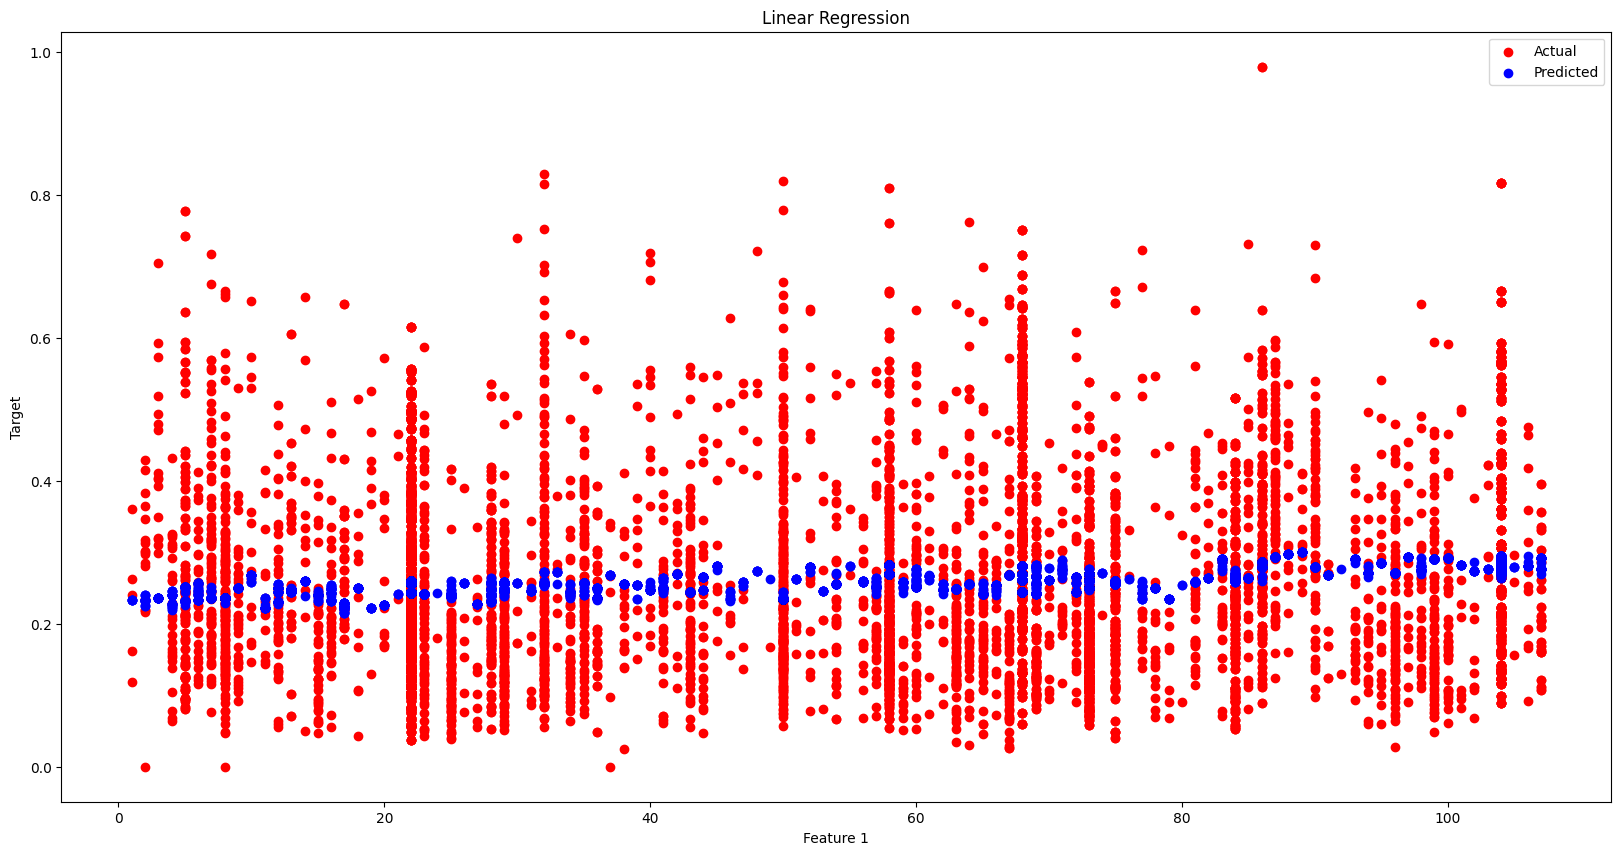

In [276]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


# Extract the features (X) and target variable (y)
X = data[['City', 'State_ab', 'cost-after-aid']].values
y = data['Mean'].values

# Create an instance of the LinearRegression model
model = LinearRegression()

# Fit the model to the data
model.fit(X, y)

# Make predictions using the trained model
y_pred = model.predict(X)

# Plot the actual data points
plt.scatter(X[:, 0], y, color='red', label='Actual')

# Plot the predicted data points
plt.scatter(X[:, 0], y_pred, color='blue', label='Predicted')

# Add labels and title to the plot
plt.xlabel('Feature 1')
plt.ylabel('Target')
plt.title('Linear Regression')

# Enlarge the graph
fig = plt.gcf()  # Get the current figure
fig.set_size_inches(20, 10)  # Set the size of the figure as desired (width, height)

# Add a legend
plt.legend()

# Show the plot
plt.show()
